# Homework 3 Fitting ODEs!

**You must work alone as much as possible on this assignment.** You are welcome to ask colleagues for help with a bug in your code, but this should be for very minor issues. 

**Tracey Moyston**
I worked alone on this homework 





# Problem 1: Analysis of a simple chemostat


Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth{(say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

We use the following equations and info to describe the chemostat dynamics:

Let: 
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/l$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/l.
- V be the volume of the chemost stat and equal to 1$l$.
- Q be the fixed volumetric flow rate and equal to 1 $l/h$.
- q = Q/V be the dilution rate ($h^{-1}$)

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

However, we have several **unknown parameters that we need to estimate**:

- r is the growth rate of bacteria ($h^{-1}$) defined as $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$, but $K_m$ and $R_{max}$ are unknown. 
- y is the yield parameter and is also unknown. 

So we went to the lab and **collected training data (see csv file).**



# In the space below, plot the training data versus time. 
    - Label all axes and data sets. Unclear figures will lose points.
    

Text(0.5, 1.0, 'Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

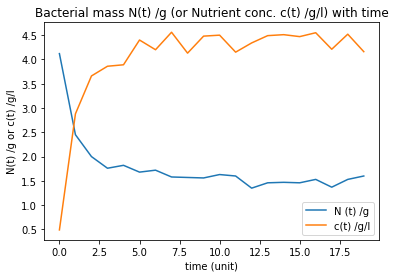

In [1]:
#solving for the parameters Rmax, km and y in the equation above from the given training data 

#import the necessary packages for the code 
import pandas as pd 
import matplotlib.pyplot as plt 

traindata=pd.read_csv('Homework 3 training data.csv') #reads into the csv file and stores it 

#plots the two columns - N and c with time from the training data 
plt.plot(traindata['time'],traindata['N'])
plt.plot(traindata['time'],traindata['c'])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [2]:
#imports the necessary packages for the code 
import numpy as np
from scipy.integrate import odeint 
from scipy.optimize import minimize

def odefunc(f,t,rmax,km,y): #defines the function for the ode equations to be used in the ode solver 
    n= f[0] #from the input array (in odeint) the first value is the n and the second is the c
    c= f[1]
    v=1 #l
    Q= 1 #l/h
    q= Q/v #/h 
    c0=8 #g/l
    r=(rmax*c)/(km+c)
    func=[(r*n)-(q*n), q*c0-q*c-((r*n)/y)]
    return func

#makes a time array based on the time column in the training data file 
t_steps= traindata.iloc[0:,0].to_numpy()

#initial conditions when time equals zero in the training data file 
ic_3=[traindata.iloc[0,1],traindata.iloc[0,2]]

#converts the training data n and c columns to an array to be used in the RMSE function
traindata1=traindata.iloc[0:,1:3].to_numpy()

def RMSE (params): #function to find the RMSE, accepts the unknow parameters 
    rmax,km,y=params #assigns the unknown parameters to a variable 
    ODE_output = odeint(odefunc, ic_3, t_steps, args = (rmax,km,y)); #solves the odes based on guess parameters 
    err=traindata1-ODE_output #finds the error between the guess and the training data and returns the RMSE 
    return np.sqrt(np.sum(err**2))


#to test that both functions return values 
testrun = odeint(odefunc, ic_3, t_steps,args= (2,1,3))
print(testrun)
testrun2=RMSE([1,1,1])
print(testrun2)



[[ 4.12        0.49      ]
 [ 6.02919219  3.73271576]
 [10.83542323  3.55768474]
 [17.22119184  1.95407608]
 [20.31796647  1.11494754]
 [20.81700098  1.01965114]
 [20.93560864  1.00625251]
 [20.97645423  1.00225268]
 [20.99134886  1.00082511]
 [20.99681874  1.00030313]
 [20.99882981  1.00011146]
 [20.99956953  1.000041  ]
 [20.99984166  1.00001508]
 [20.99994165  1.00000556]
 [20.99997854  1.00000204]
 [20.99999214  1.00000075]
 [20.99999717  1.00000027]
 [20.99999899  1.0000001 ]
 [20.99999965  1.00000003]
 [20.9999999   1.00000001]]
12.115030425782004


# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

      fun: 0.7761285145949891
 hess_inv: array([[ 0.02548969, -0.02310572, -0.00303392],
       [-0.02310572,  0.10977446,  0.00149461],
       [-0.00303392,  0.00149461,  0.00349937]])
      jac: array([-2.45869160e-07, -1.71363354e-07,  8.49366188e-07])
  message: 'Optimization terminated successfully.'
     nfev: 256
      nit: 35
     njev: 64
   status: 0
  success: True
        x: array([ 5.18060622, 18.35745071,  0.4258696 ])


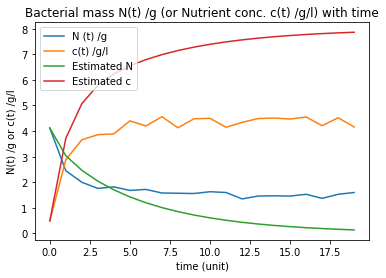

In [3]:
#initial guess with 0.9,0.6,0.1

#it should be noted that this initial guess was originally run when there was an error in the above functions. The 
#error was that the time vector was a random array of times and a row of the training data was missing. The guess in
#canvas and the cell below reflect the answer given when the function was incorrect 

ODE_output = odeint(odefunc, ic_3, t_steps, args = (0.9,0.6,1));
plt.plot(traindata['time'],traindata['N']) 
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(0.9,0.6,1));
print(sol);

      fun: 0.8111539125921465
 hess_inv: array([[ 6.34223932e+02, -1.42845941e+02, -4.49978465e-01],
       [-1.42845941e+02,  3.32239281e+01,  1.01545079e-01],
       [-4.49978465e-01,  1.01545079e-01,  3.63614551e-03]])
      jac: array([-7.45058060e-09,  4.17232513e-07, -1.11758709e-07])
  message: 'Optimization terminated successfully.'
     nfev: 81
      nit: 15
     njev: 19
   status: 0
  success: True
        x: array([5.34942779e+02, 2.32840309e+03, 4.21321130e-01])


/Users/traceymoyston/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/traceymoyston/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


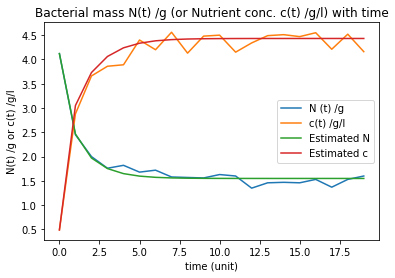

In [4]:
#second guess from the incorrect function 5.26816896e+02, 2.33023652e+03, 4.34262623e-01. Keeping the y value because 
#it was correct in canvas 

ODE_output = odeint(odefunc, ic_3, t_steps, args = (5.26816896e+02, 2.33023652e+03, 4.34262623e-01));
plt.plot(traindata['time'],traindata['N']) 
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(5.26816896e+02, 2.33023652e+03, 4.34262623e-01));
print(sol);


      fun: 0.7761285146469237
 hess_inv: array([[ 2.93006455e+02,  1.27767646e+03, -3.32798312e-01],
       [ 1.27767646e+03,  5.57219173e+03, -1.43708039e+00],
       [-3.32798312e-01, -1.43708039e+00,  3.91632184e-03]])
      jac: array([ 1.00582838e-06, -2.45869160e-07, -9.75281000e-06])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 21
     njev: 27
   status: 0
  success: True
        x: array([ 5.18068152, 18.35777885,  0.42586948])


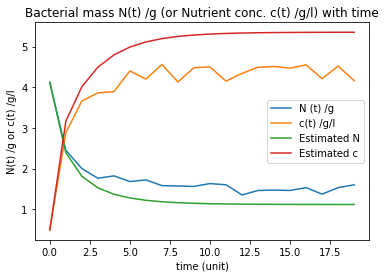

In [5]:
#third guess keeping the y value and decreasing the guesses by an order of 100

ODE_output = odeint(odefunc, ic_3, t_steps, args = (5.34942779, 2.32840309e+01, 4.21321130e-01));
plt.plot(traindata['time'],traindata['N']) #0.9 0.6 1
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(5.34942779, 2.32840309e+01, 4.21321130e-01));
print(sol);

      fun: 0.7761285145564979
 hess_inv: array([[ 8.74909874e-02,  2.09214997e-01, -3.10352623e-03],
       [ 2.09214997e-01,  9.52032346e-01,  4.78854095e-04],
       [-3.10352623e-03,  4.78854095e-04,  3.45827699e-03]])
      jac: array([ 5.21540642e-08,  3.72529030e-07, -6.25848770e-07])
  message: 'Optimization terminated successfully.'
     nfev: 41
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 5.18048928, 18.35694073,  0.42586972])


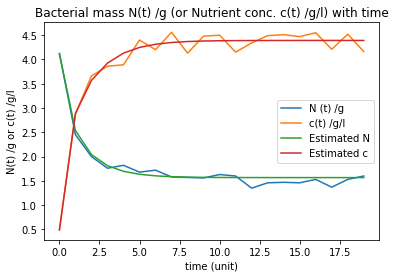

In [6]:
#second guess in canvas since the plot looked good 

ODE_output = odeint(odefunc, ic_3, t_steps, args = (5.18048667, 18.35692957, 4.34262623e-01));
plt.plot(traindata['time'],traindata['N']) #0.9 0.6 1
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(5.18048667, 18.35692957, 4.34262623e-01));
print(sol);

      fun: 0.811010159513846
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([ 7.45058060e-09,  3.12924385e-07, -1.25914812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([4.27776568e+02, 1.86110208e+03, 4.21330207e-01])


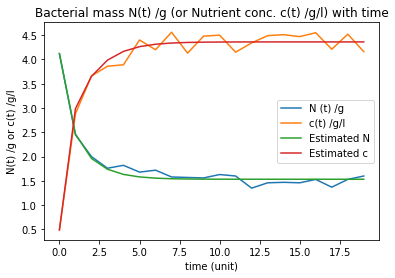

In [7]:
#canvas guess after guessing a few numbers and seeing that the plot looks good 

ODE_output = odeint(odefunc, ic_3, t_steps, args = ( 4.27776568e+02, 1.86110208e+03, 4.21330207e-01));
plt.plot(traindata['time'],traindata['N']) 
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(4.27776568e+02, 1.86110208e+03, 4.21330207e-01));
print(sol);

      fun: 0.7761285145633245
 hess_inv: array([[0.09731376, 0.18594214, 0.00463417],
       [0.18594214, 0.5056035 , 0.03390629],
       [0.00463417, 0.03390629, 0.00439596]])
      jac: array([-2.00793147e-05,  4.79072332e-06, -1.42082572e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 366
      nit: 28
     njev: 89
   status: 2
  success: False
        x: array([ 5.18044264, 18.3567407 ,  0.42586979])


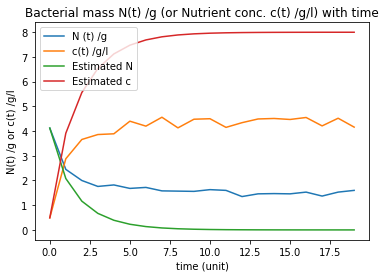

In [13]:
ODE_output = odeint(odefunc, ic_3, t_steps, args = ( 0.59342198, 1.98112978,  0.42587009));
plt.plot(traindata['time'],traindata['N']) 
plt.plot(traindata['time'],traindata['c'])
plt.plot(t_steps,ODE_output[:,0])
plt.plot(t_steps,ODE_output[:,1])
plt.xlabel('time (unit)')
plt.ylabel('N(t) /g or c(t) /g/l')
plt.legend(['N (t) /g','c(t) /g/l','Estimated N','Estimated c'])
plt.title ('Bacterial mass N(t) /g (or Nutrient conc. c(t) /g/l) with time')

sol = minimize(RMSE, x0=(0.59342198, 1.98112978,  0.42587009));
print(sol);